In [2]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\GlebB\.julia\registries\General.toml`
   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed OffsetArrays ───────────────────── v1.12.10
   Installed PDMats ─────────────────────────── v0.11.31
   Installed StatsFuns ──────────────────────── v1.3.0
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed DifferentialEquations ──────────── v7.11.0
   Installed Accessors ──────────────────────── v0.1.33
   Installed NonlinearSolve ─────────────────── v2.8.2
   Installed EnumX ──────────────────────────── v1.0.4
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed Polyester ──────────────────────── v0.7.9
   Installed CEnum ──────────────────────────── v0.5.0
   Installed StaticArrays ───────────────────── v1.8.0
   Installed DelimitedFiles ─────────────────── v1.9.1
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed RecursiveArrayTools ────────────── v2.38.10
   

In [6]:
using DifferentialEquations

#задаём описание модели с начальными условиями
a = 0.98
f(u,p,t)=a*u
u0=1.0

#задаем интервал времени
tspan=(0.0,1.0)

#решение
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.0.1+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed GR_jll ─────────────────────── v0.72.10+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed ConcurrentUtilities ────────── v2.3.0
   Installed Measures ───────────────────── v0.3.2
   Installed Unitful ────────────────────── v1.19.0
   Installed Contour ────────────────────── v0.6.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed PlotUtils ──

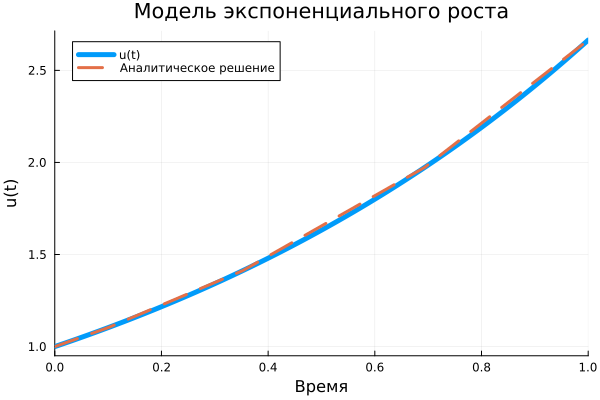

In [7]:
#подключаем необходимые пакеты
Pkg.add("Plots")
using Plots

#строим графики
plot(sol, linewidth=5, title="Модель экспоненциального роста", xaxis="Время", yaxis="u(t)", label="u(t)")
plot!(sol.t, t->1.0*exp(a*t), lw=3, ls=:dash, label="Аналитическое решение")

In [8]:
# задаём точность решения:
sol = solve(prob, abstol=1e-8, reltol=1e-8)
println(sol)

ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Vern7{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rodas5P{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}}, OrdinaryDiffEq.AutoSwitchCache{Vern7{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rodas5P{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing},

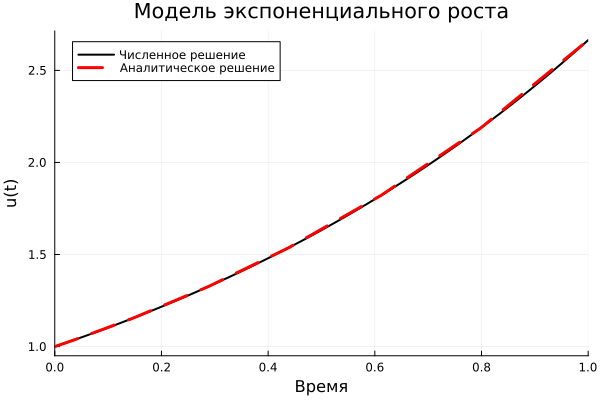

In [9]:
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время", yaxis="u(t)", label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t), lw=3, ls=:dash, color="red", label="Аналитическое решение")

In [10]:
using DifferentialEquations, Plots;

# задаём описание модели:
function lorenz!(du,u,p,t)
σ,ρ,β = p
du[1] = σ*(u[2]-u[1])
du[2] = u[1]*(ρ-u[3]) - u[2]
du[3] = u[1]*u[2] - β*u[3]
end

# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0)

# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1263-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.02768995855685593
   0.04185635042021763
   0.06024041165841079
   0.08368541255159562
   0.11336499649094857
   0.1486218182609657
   0.18703978481550704
   ⋮
  99.05535949898116
  99.14118781914485
  99.22588252940076
  99.30760258626904
  99.39665422328268
  99.49536147459878
  99.58822928767293
  99.68983993598462
  99.77864535713971
  99.85744078539504
  99.93773320913628
 100.0
u: 1263-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.001046162

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


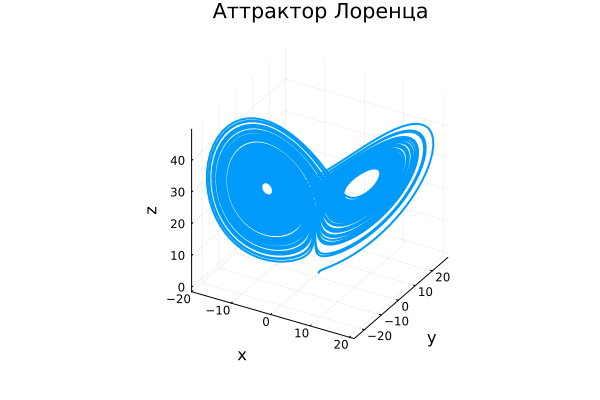

In [11]:
# подключаем необходимые пакеты:
using Plots
# строим график:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x", yaxis="y", zaxis="z", legend=false)

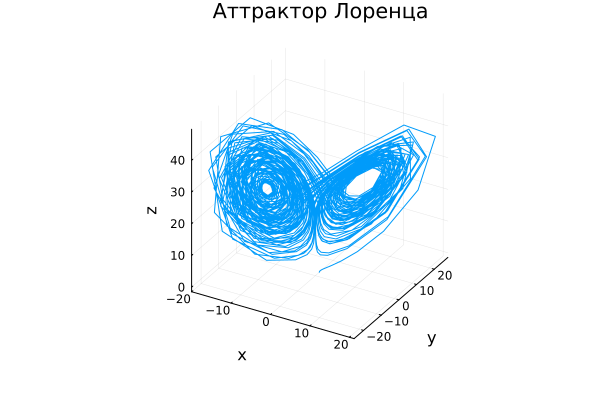

In [12]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x", yaxis="y", zaxis="z", legend=false)

In [13]:
# подключаем необходимые пакеты:
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
   Installed Bijections ────────────── v0.1.6
   Installed SIMD ──────────────────── v3.4.6
   Installed TimerOutputs ──────────── v0.5.23
   Installed MultivariatePolynomials ─ v0.5.3
   Installed LabelledArrays ────────── v1.15.0
   Installed MutableArithmetics ────── v1.4.0
   Installed DomainSets ────────────── v0.6.7
   Installed CompositeTypes ────────── v0.1.3
   Installed Glob ──────────────────── v1.3.1
   Installed JuliaFormatter ────────── v1.0.45
   Installed Symbolics ─────────────── v5.11.0
   Installed DynamicPolynomials ────── v0.5.3
   Installed MLStyle ───────────────── v0.4.17
   Installed CommonMark ────────────── v0.8.12
   Installed ModelingToolkit ───────── v8.73.2
   Installed Tokenize ──────────────── v0.5.26
   Installed ParameterizedFunctions ── v5.16.0
   Installed LambertW ──────────────── v0.4.6
   Installed AbstractTrees ─────────── v0.4.4
   Installed ChainRulesCore ────────── v1.18.0
   Installed Combinatorics ──────────

In [14]:
using ParameterizedFunctions, DifferentialEquations, Plots;
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d

# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821987497083
  0.9444046158046306
  1.2674601546021105
  1.6192913303893046
  1.9869754428624007
  2.2640902393538296
  2.5125484290863063
  2.7468280298123062
  3.0380065851974147
  ⋮
  6.455762090996754
  6.780496138817711
  7.171040059920871
  7.584863345264154
  7.978068981329682
  8.48316543760351
  8.719248247740158
  8.949206788834692
  9.200185054623292
  9.438029017301554
  9.711808134779586
 10.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.876719395008001, 0.32473342927911314]
 [2.5882500645533466, 0.26336255535952163]
 [3.8607089092207665, 0.2794458098285253]
 [5.750812667710396, 0.5220072537934558]
 [

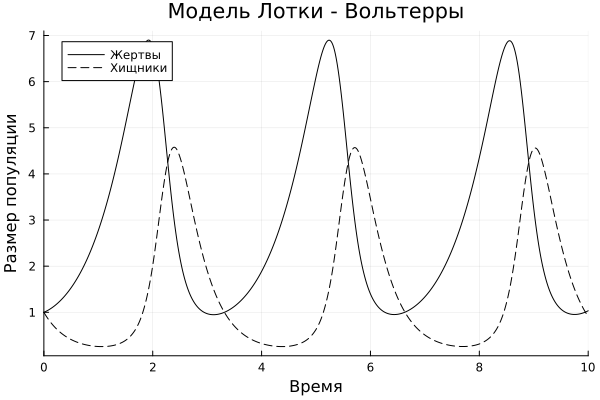

In [15]:
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры",
    xaxis="Время",yaxis="Размер популяции")

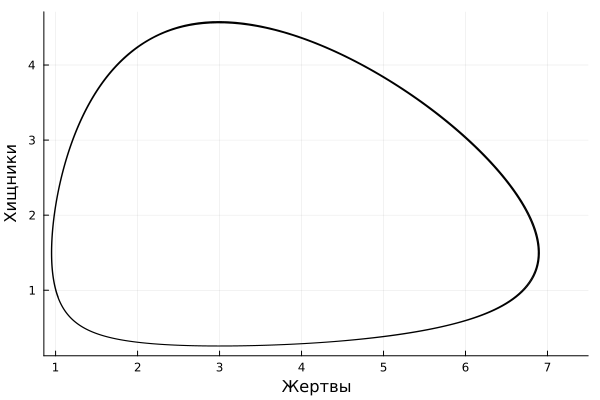

In [16]:
# фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

In [17]:
#ЗАДАНИЕ №1

using ParameterizedFunctions, DifferentialEquations, Plots;

lv! = @ode_def Malthus begin
    dx = a*x
end a

u0 = [2]
b = 3.0
c = 1.0
p = (b - c)
tspan = (0.0, 3.0)

prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 12-element Vector{Float64}:
 0.0
 0.07579340539309044
 0.2176538131796436
 0.39326275375009306
 0.6100444793398203
 0.8636787203353302
 1.1544101119687582
 1.4789340537388638
 1.8349001265017795
 2.219134461733416
 2.628731787861167
 3.0
u: 12-element Vector{Vector{Float64}}:
 [2.0]
 [2.327358634990142]
 [3.0908767890047213]
 [4.391507855871063]
 [6.774976441549192]
 [11.251525438518586]
 [20.12503871207196]
 [38.513500897099114]
 [78.48706775956025]
 [169.25231460681178]
 [383.9709586782193]
 [806.8145670268354]

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141


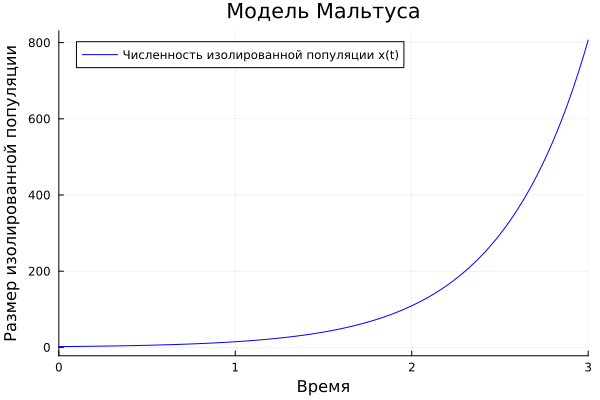

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [18]:
plot(sol, label = "Численность изолированной популяции x(t)", color="blue", ls=[:solid], title="Модель Мальтуса", xaxis="Время", yaxis="Размер изолированной популяции")

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:2000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:3000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:5000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:6000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indic

Plots.AnimatedGif("C:\\Users\\GlebB\\Malthus.gif")
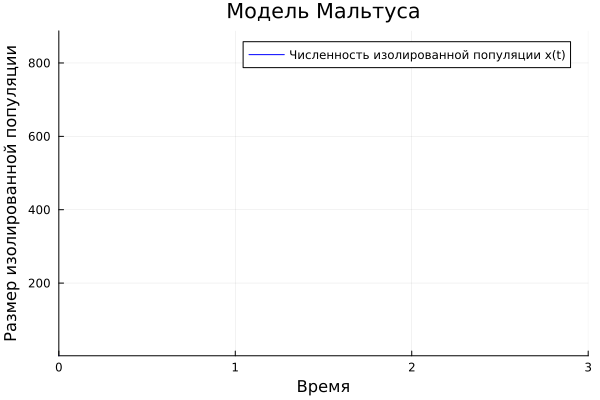

In [19]:
animate(sol, fps=7, "Malthus.gif", label = "Численность изолированной популяции x(t)", color="blue", ls=[:solid], title="Модель Мальтуса", xaxis="Время", yaxis="Размер изолированной популяции")

In [20]:
#ЗАДАНИЕ №2

lv! = @ode_def Logistic_population begin
    dx = r*x*(1 - x/k)
    end r k

u0 = [1.0]
p = (0.9, 20)
tspan = (0.0, 10.0)

prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 14-element Vector{Float64}:
  0.0
  0.10320330193850687
  0.3855506045099877
  0.780748965506008
  1.262015691559725
  1.8586159628422565
  2.574933530608521
  3.471498551774082
  4.571529609523612
  5.629314234929612
  6.930091225213617
  8.078262639019435
  9.531767314565881
 10.0
u: 14-element Vector{Vector{Float64}}:
 [1.0]
 [1.092018818522065]
 [1.3860627615966585]
 [1.9212436077635002]
 [2.816088473652035]
 [4.379382291381814]
 [6.9638339217858904]
 [10.897151531483962]
 [15.262798385676023]
 [17.860400164058895]
 [19.28300459695191]
 [19.73872139608262]
 [19.928358494866384]
 [19.95293645513508]

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141


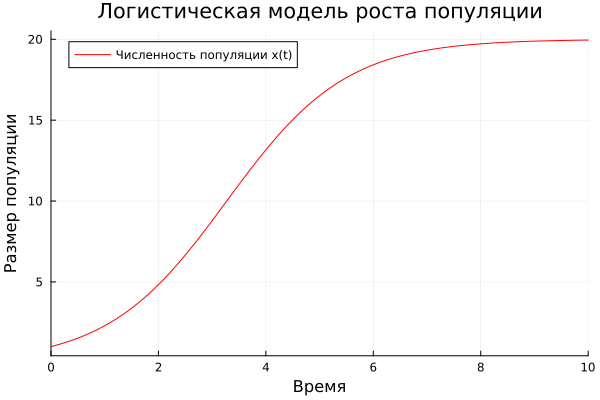

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [21]:
plot(sol, label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая модель роста популяции", xaxis="Время", yaxis="Размер популяции")

┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:1000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:2000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:3000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:4000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:5000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linestyle` does not match data indices 1:6000.
└ @ Plots C:\Users\GlebB\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indic

Plots.AnimatedGif("C:\\Users\\GlebB\\Logistic_population.gif")
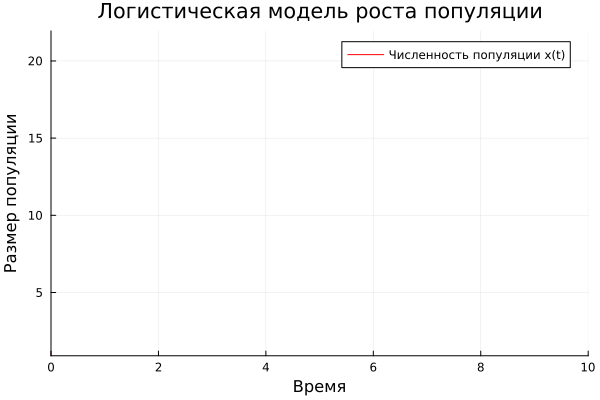

In [22]:
animate(sol, fps=7, "Logistic_population.gif", label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая модель роста популяции", xaxis="Время", yaxis="Размер популяции")

In [23]:
#ЗАДАНИЕ №3

lv! = @ode_def SIR begin
ds = - b*i*s
di = b*i*s - v*i
dr = v*i
end b v

u0 = [1.0, 0.1, 0]
p = (0.25, 0.05)
tspan = (0.0, 100.0)

prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 19-element Vector{Float64}:
   0.0
   0.08088145925786733
   0.674649456103469
   1.9774507638268786
   3.928608933045557
   6.371598738903415
   9.52414865378298
  13.099293783864182
  17.0272982736033
  22.927215420937856
  27.195723313986843
  33.36650873512655
  39.87152643660008
  49.090534040944405
  57.69126316873367
  69.09753551513025
  81.37728197451536
  95.06634205664659
 100.0
u: 19-element Vector{Vector{Float64}}:
 [1.0, 0.1, 0.0]
 [0.9979636107059043, 0.10162869618330198, 0.0004076931107937434]
 [0.9821139347502068, 0.11427647441254161, 0.003609590837251619]
 [0.9414409947662143, 0.1464902846000639, 0.012068720633721717]
 [0.8642596086672918, 0.2065639776528575, 0.029176413679850716]
 [0.74121657128916, 0.29889094291007307, 0.05989248580076701]
 [0.5567300467580422, 0.42613510184975667, 0.11713485139220119]
 [0.360654706841008, 0.53537

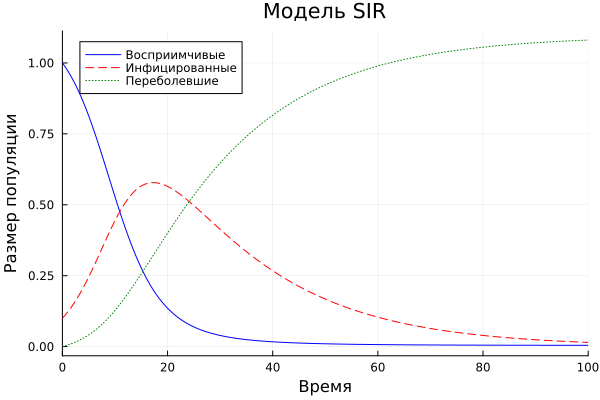

In [24]:
plot(sol, label = ["Восприимчивые" "Инфицированные" "Переболевшие"], color=["blue" "red" "green"], ls=[:solid :dash :dot], title="Модель SIR", xaxis="Время",yaxis="Размер популяции")

Plots.AnimatedGif("C:\\Users\\GlebB\\SIR.gif")
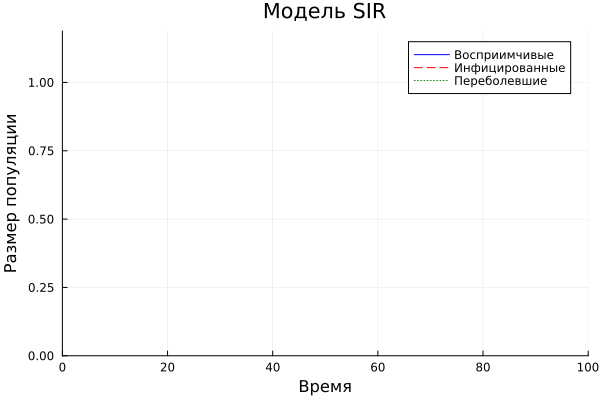

In [25]:
animate(sol, fps=7, "SIR.gif", label = ["Восприимчивые" "Инфицированные" "Переболевшие"], color=["blue" "red" "green"], ls=[:solid :dash :dot], title="Модель SIR", xaxis="Время",yaxis="Размер популяции")

In [26]:
#ЗАДАНИЕ №4

M = 1.0

lv! = @ode_def SEIR begin
ds = -(β/M)*s*i
de = (β/M)*s*i - δ*e
di = δ*e - γ*i
dr = γ*i
end β γ δ

initialInfect = 0.1
u0 = [(M - initialInfect), 0.0, initialInfect, 0.0]
p = (0.6, 0.2, 0.1)
tspan = (0.0, 100.0)

prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 25-element Vector{Float64}:
   0.0
   0.024423707511123237
   0.21983937298994613
   0.672446110582935
   1.3433111385495904
   2.2048531822239386
   3.3191976283637796
   4.685982405908369
   6.3524541259891905
   8.357303010682124
  10.779894718728759
  13.70832499771059
  17.247755058759296
  21.418982739513048
  26.11587299819979
  31.347120286227476
  37.434253818037966
  45.57027277276479
  51.92822542671895
  59.56906630189384
  67.00367237385267
  75.35077774263594
  84.11521635193901
  93.80030928820192
 100.0
u: 25-element Vector{Vector{Float64}}:
 [0.9, 0.0, 0.1, 0.0]
 [0.8986852898870974, 0.0013131042225504326, 0.09951432022141568, 0.000487285668936548]
 [0.8884555417234649, 0.011417324323729522, 0.09582374914118306, 0.004303384811622592]
 [0.866527396902727, 0.03234294107695571, 0.08849598302303603, 0.012633678997281277]
 [0.837668653812

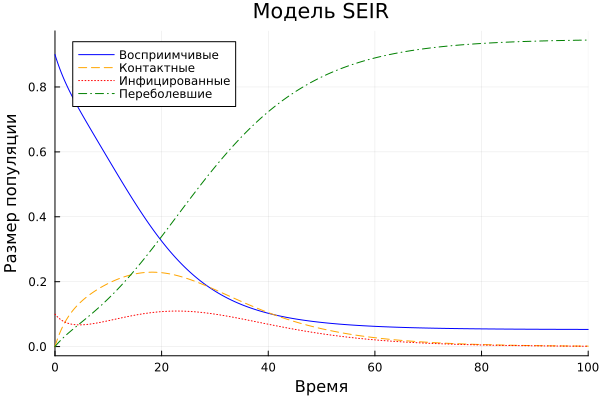

In [27]:
plot1 = plot(sol, label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot], title="Модель SEIR", xaxis="Время",yaxis="Размер популяции")

Plots.AnimatedGif("C:\\Users\\GlebB\\SEIR.gif")
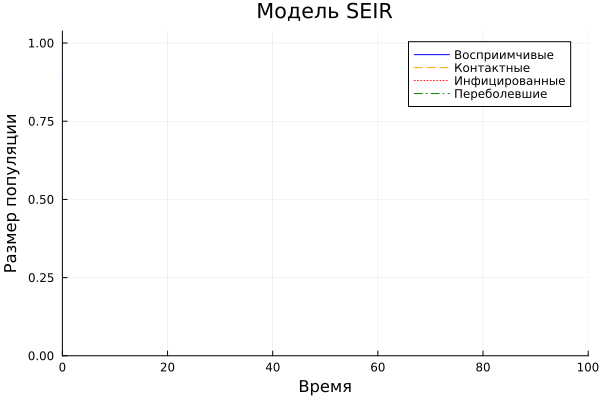

In [28]:
animate(sol, fps=7, "SEIR.gif", label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot], title="Модель SEIR", xaxis="Время",yaxis="Размер популяции")

In [29]:
#ЗАДАНИЕ №6

lv! = @ode_def CompetitiveSelectionModel begin
dx = a*x - b*x*y
dy = a*y - b*x*y
    end a b

u0 = [1.0, 1.4]
p = (0.5, 0.2)
tspan = (0.0, 10.0)

prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 20-element Vector{Float64}:
  0.0
  0.13063515958673816
  0.6620095919016169
  1.4745519498111759
  2.384274376329455
  3.4538271544345127
  4.562673961852109
  5.67839475574588
  6.618742680948912
  7.174117808180357
  7.581652232104449
  7.907287404662807
  8.211743148258813
  8.476131118651619
  8.723933719403542
  8.961493008998673
  9.203605421462836
  9.457562739292689
  9.735425791326456
 10.0
u: 20-element Vector{Vector{Float64}}:
 [1.0, 1.4]
 [1.028414415994334, 1.4554136105342876]
 [1.1349867943706582, 1.6919333806954628]
 [1.2538768556942972, 2.0899703101538307]
 [1.2907022905384151, 2.608347267277165]
 [1.1633365332504924, 3.412641939340822]
 [0.8307911711859107, 4.746685014866651]
 [0.3930025927897952, 7.233789081223332]
 [0.11653304820955845, 11.063651811087418]
 [0.03764043695860551, 14.488643868861088]
 [0.012491831797030182, 17.72960

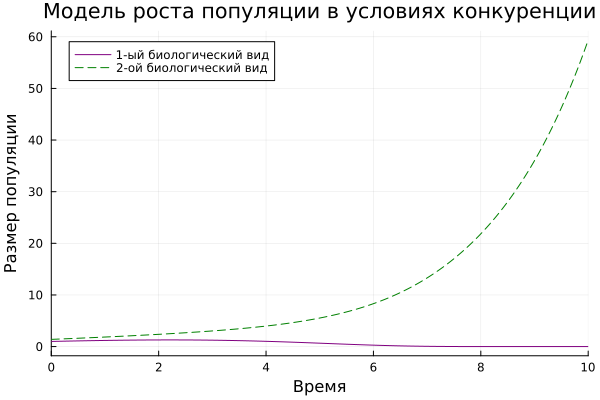

In [30]:
plot(sol, label = ["1-ый биологический вид" "2-ой биологический вид"], color=["purple" "green"], ls=[:solid :dash], title="Модель роста популяции в условиях конкуренции", xaxis="Время",yaxis="Размер популяции")

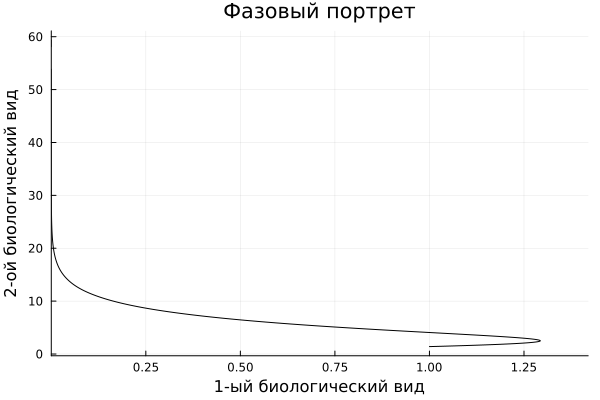

In [31]:
# фазовый портрет:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", xaxis="1-ый биологический вид", yaxis="2-ой биологический вид", legend=false)

Plots.AnimatedGif("C:\\Users\\GlebB\\CompetitiveSelectionModel.gif")
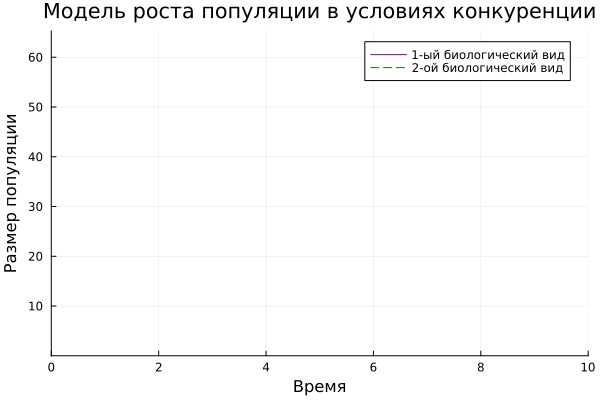

In [32]:
animate(sol, fps=7, "CompetitiveSelectionModel.gif", label = ["1-ый биологический вид" "2-ой биологический вид"], color=["purple" "green"], ls=[:solid :dash],  title="Модель роста популяции в условиях конкуренции", xaxis="Время",yaxis="Размер популяции")